In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, PowerTransformer

In [2]:

# Load the dataset
def check_dataset(path):
  file_path = path
  data = pd.read_csv(file_path)

  #Check for null(NaN,Invalid) values
  null_values = data.isnull().sum()
  print("\nNull values in each column:")
  print(null_values)

  #Check for duplicate rows
  duplicates = data.duplicated().sum()
  print(f"\nNumber of duplicate rows: {duplicates}")

  #Check data types
  print("\nData types and basic info:")
  print(data.info())

  print("\nUnique values in categorical columns:")
  categorical_columns = data.select_dtypes(include=['object']).columns
  for col in categorical_columns:
      print(f"{col}: {data[col].unique()}")
  return data
path="../data/diabetes_dataset.csv"
data=check_dataset(path)


Null values in each column:
year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

Number of duplicate rows: 14

Data types and basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:

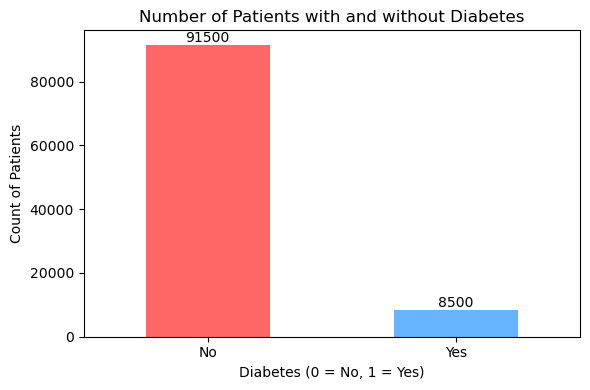

In [3]:
diabetes_counts = data['diabetes'].value_counts()

# Create a bar chart to visualize how many patients have diabetes (1) or not (0)
plt.figure(figsize=(6, 4))
bars = diabetes_counts.plot(kind='bar', color=['#ff6666', '#66b3ff'])

# Add titles and labels
plt.title('Number of Patients with and without Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count of Patients')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Annotate the bars with the exact values
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2,  # Position the text
             f'{int(height)}',  # Text value (integer)
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()

***Unprocessing dataset***

In [4]:
#Imputing null values
num_rows = len(data)
ten_percent = int(num_rows * 0.1)
null_indices = np.random.choice(data.index, size=ten_percent // 3, replace=False)
print(null_indices)
null_column = ["year","gender","age","location","hypertension","heart_disease","smoking_history","bmi","hbA1c_level","blood_glucose_level","diabetes"]

columns_to_null = np.random.choice(null_column, size=len(null_indices))
print(len(columns_to_null))
for idx, col in zip(null_indices, columns_to_null):
    data.loc[idx, col] = np.nan



[76128 63134 53832 ... 78250 44336 50079]
3333


In [5]:
#Duplicating rows
duplicate_indices = np.random.choice(data.index, size=ten_percent // 3, replace=False)
duplicates = data.iloc[duplicate_indices]
data = pd.concat([data, duplicates], ignore_index=True)

In [6]:
#Saving dataset
modified_file_path = "../data/unprocessed_dataset.csv"
data.to_csv(modified_file_path, index=False)

In [9]:
#checking unprocessed dataset
data1=check_dataset("../data/unprocessed_dataset.csv")


Null values in each column:
year                    317
gender                  283
age                     326
location                288
race:AfricanAmerican      0
race:Asian                0
race:Caucasian            0
race:Hispanic             0
race:Other                0
hypertension            343
heart_disease           308
smoking_history         309
bmi                     306
hbA1c_level             314
blood_glucose_level     311
diabetes                329
dtype: int64

Number of duplicate rows: 3347

Data types and basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103333 entries, 0 to 103332
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  103016 non-null  float64
 1   gender                103050 non-null  object 
 2   age                   103007 non-null  float64
 3   location              103045 non-null  object 
 4   race:AfricanAmerican  